In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading the csv file 
dataframe = pd.read_csv("heart_v2.csv")

In [3]:
# fetch the column names
dataframe.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
# fetch sample records
dataframe.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
# assign feature variables to x
X = dataframe.drop('heart disease', axis=1)
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [6]:
# assing resposse variable to y
y = dataframe['heart disease']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [7]:
# create train test split
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [9]:
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [10]:
# import the Decision Tree library
from sklearn.tree import DecisionTreeClassifier

In [11]:
# create the decision treee classifier model
# hyperparameter => max_depth=3
dt = DecisionTreeClassifier(max_depth=3)

# fit the data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
!pix install six

/bin/bash: pix: command not found


In [14]:
# importing packages for vizualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, pygraphviz
#import graphviz

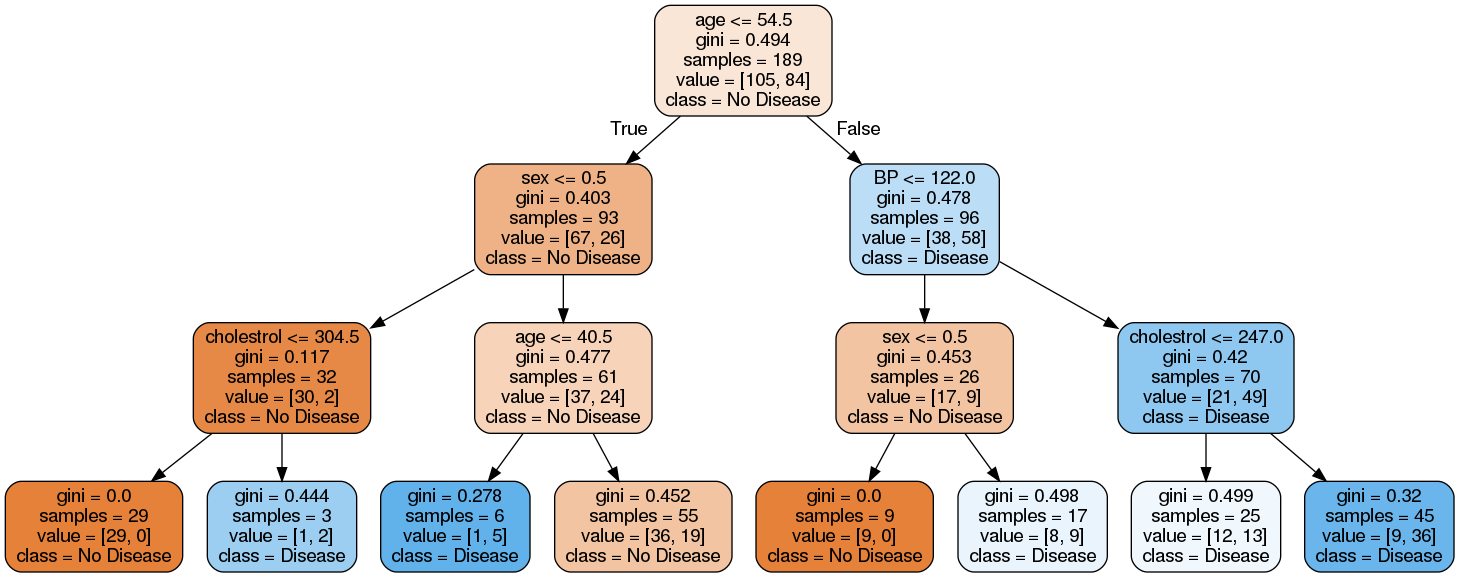

In [16]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Evaluating model performance

In [17]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [19]:
# import confusion matrix library
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
# get accuracy score on train data
print(accuracy_score(y_train, y_train_pred))

0.7354497354497355


In [22]:
# get confusion maxtric on train data
confusion_matrix(y_train, y_train_pred)

array([[74, 31],
       [19, 65]])

In [24]:
# get accuracy score on test date
print(accuracy_score(y_test, y_test_pred))

0.5432098765432098


In [25]:
# get confusion matrix on test data
confusion_matrix(y_test, y_test_pred)

array([[22, 23],
       [14, 22]])